# Automatic question categorization (exploration)
Pierre-Yves BOISBUNON - February 2018

----------

In this notebook, we will explore the following dataset  and clean some of the data.
http://data.stackexchange.com/stackoverflow
Data can be extracted with the following SQL request:
```sql
select 
    * 
from 
    Posts 
where 
    (CreationDate >= '2017-12-01 00:03:47') and (CreationDate <= '2018-01-03 21:39:21')
and Score > 0
and Tags != ''
```
The target of this notebook to do an EDA of questions/tags provided by StackOverflow.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from __future__ import division
import utils

# 1. Exploration and Cleaning

Let's import the dataset first

In [272]:
df = pd.read_csv('QueryResults.csv', sep=',')

Let's preview the dataset

In [273]:
df.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
0,47584642,1,47585387.0,NaN,2017-12-01 00:03:47,NaN,2,28,<p>I have two dataframes that I'm trying to co...,7107425.0,...,NaN,NaN,2017-12-01 01:37:20,How to combine two differently multi-indexed p...,<python><pandas>,1,1,NaN,NaN,NaN
1,47584647,1,47599207.0,NaN,2017-12-01 00:04:19,NaN,2,159,<p>I need to do the ‘vlookup’ function using t...,7584138.0,...,NaN,2017-12-01 07:14:32,2017-12-02 01:40:27,How to reduce the time cost while looping in a...,<vba><excel-vba><ms-access>,2,21,4.0,NaN,NaN
2,47584661,1,NaN,NaN,2017-12-01 00:05:22,NaN,1,25,"<p>I have Eclipse CDT Oxygen on Ubuntu 16.04, ...",5262639.0,...,NaN,2017-12-01 18:21:45,2017-12-01 18:21:45,Eclipse CDT Oxygen with LLVM support forces st...,<c++><llvm><ubuntu-16.04><eclipse-cdt><clang++>,0,0,NaN,NaN,NaN
3,47584702,1,NaN,NaN,2017-12-01 00:10:02,NaN,1,65,<p>I use ' SelectionMode : Row ' now</p>\n\n<p...,8629804.0,...,NaN,2017-12-01 01:26:07,2017-12-01 01:26:07,How to get selected row in C1flexgrid?,<c#><c1flexgrid>,0,2,NaN,NaN,NaN
4,47584704,1,47584882.0,NaN,2017-12-01 00:10:12,NaN,2,12,"<p>For educational purposes, I am looking for ...",93212.0,...,NaN,2017-12-01 00:20:28,2017-12-01 13:24:20,How to get visual output when git reset modifi...,<git><git-reset><git-show>,1,0,NaN,NaN,NaN


If we display a static summary of the dataset we can see:

In [274]:
# Display a column summary
stats = utils.display_dataframe_stats(df)
stats

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
type,int64,int64,float64,float64,object,float64,int64,int64,object,float64,...,object,object,object,object,object,int64,int64,float64,object,float64
number of unique values,50000,1,25375,0,49469,0,50,654,50000,40189,...,62,28349,49539,50000,36085,13,35,17,1613,0
number of missing values,0,0,24625,50000,0,50000,0,0,0,212,...,49912,21466,0,0,0,0,0,40106,48387,50000
% of missing values,0,0,49.25,100,0,100,0,0,0,0.424,...,99.824,42.932,0,0,0,0,0,80.212,96.774,100


Let's remove all duplicates values

In [275]:
df.drop_duplicates(inplace=True)

The dataset is composed as below:

In [276]:
df.shape

(50000, 22)

In this project, the valuable variables are:
- **Body**
- **Title**
- **Tags**

The Date excursion for the questions requested is from 1st december, 2017 until the 3rd of January 2018.

In [277]:
df['CreationDate'].min()

'2017-12-01 00:03:47'

In [278]:
df['CreationDate'].max()

'2018-01-03 21:39:21'

## 1.1 OwnerUserId

Let's observe OwnerUserId variable:

In [279]:
df['OwnerUserId'].describe()

count    4.978800e+04
mean     5.450860e+06
std      3.015263e+06
min      9.500000e+01
25%      2.689994e+06
50%      5.805398e+06
75%      8.487384e+06
max      9.170074e+06
Name: OwnerUserId, dtype: float64

**40189** contributors are found for this period.

In [280]:
df['OwnerUserId'].nunique()

40189

In [281]:
temp=df[['OwnerUserId','Title']].drop_duplicates()
temp=temp.groupby(['OwnerUserId'])['Title'].count().reset_index().sort_values('Title', ascending=False)
temp[:5]

,OwnerUserId,Title
19343,5661749.0,22
9774,2670744.0,20
610,149138.0,19
5482,1422604.0,18
27030,7820956.0,18


In [282]:
temp=df[['OwnerUserId','Tags']].drop_duplicates()
temp=temp.groupby(['OwnerUserId'])['Tags'].count().reset_index().sort_values('Tags', ascending=False)
temp[:5]

,OwnerUserId,Tags
610,149138.0,18
33881,9028003.0,17
6542,1705266.0,17
19343,5661749.0,16
13720,3956731.0,16


We can see that some contributors are generating more questions than the other with a quite huge variety of tags.

In [283]:
df[df.OwnerUserId == 5661749.0].Tags

1220                     <laravel><eloquent>
2284                     <laravel><eloquent>
3415     <javascript><typescript><decorator>
6832                <javascript><typescript>
7322                            <typescript>
8669                                   <css>
12141              <javascript><inheritance>
15115    <javascript><typescript><decorator>
16751       <php><laravel><service-provider>
18482              <typescript><meteor><npm>
26027                <javascript><filenames>
27130    <javascript><typescript><decorator>
27134         <vue.js><vue-class-components>
27895                   <javascript><meteor>
28839                   <javascript><vue.js>
28979               <javascript><typescript>
29004       <javascript><vue.js><vuetify.js>
40653                      <javascript><dom>
41253                    <laravel><eloquent>
42961                    <laravel><eloquent>
47482                     <oauth><oauth-2.0>
49101                   <typescript><vue.js>
Name: Tags

## 1.2 Tags

Let's observe tags, now:

In [284]:
len(df['Tags'].unique())

36085

In [285]:
df['Tags'].describe()

count            50000
unique           36085
top       <javascript>
freq               224
Name: Tags, dtype: object

Each tag is separated with encapsulated with '<>'.
Let's remove these extra caracters.

In [286]:
df['Tags'][:10]

0                                     <python><pandas>
1                          <vba><excel-vba><ms-access>
2      <c++><llvm><ubuntu-16.04><eclipse-cdt><clang++>
3                                     <c#><c1flexgrid>
4                           <git><git-reset><git-show>
5             <javascript><arrays><object><dictionary>
6                           <java><jms><message-queue>
7     <angular><typescript><angular2-aot><angular-aot>
8                                 <python><dictionary>
9    <xcode><uistoryboard><xcode-storyboard><adapti...
Name: Tags, dtype: object

In [287]:
# Remove first '<'
df['Tags'] = df['Tags'].apply(lambda x: x[1:])
# Remove last '>'
df['Tags'] = df['Tags'].apply(lambda x: x[:-1])
# Replace '><' with '|'
df['Tags'] = df['Tags'].replace({'><':'|'}, regex=True)

Number of unique **tags** for all questions:

In [288]:
list_of_tags = '|'.join(df["Tags"].tolist())
list_of_unique_tags = set(list_of_tags.split('|'))
len(list_of_unique_tags)

13429

In [289]:
x = list(map(lambda x: x.count('|'), df['Tags']))

In [290]:
max(x)

4

Maximum number of **tags** per question is **5**

In [291]:
np.mean(x)

2.09314

Mean number of **tags** per question is **3**

In [292]:
import operator
tags_occurences = dict.fromkeys(list_of_unique_tags, 0)
for elem in df['Tags'].str.split('|'):
    for val in [val for val in elem if val in list_of_unique_tags]:
            tags_occurences[val] += 1
# Sort descending order
tags_occurences = sorted(tags_occurences.items(), key=operator.itemgetter(1), reverse=True)
print(tags_occurences)

[('javascript', 5743), ('python', 5520), ('java', 3744), ('android', 3071), ('php', 2906), ('c#', 2906), ('html', 2163), ('jquery', 1846), ('r', 1804), ('c++', 1699), ('css', 1616), ('ios', 1489), ('angular', 1476), ('python-3.x', 1356), ('sql', 1284), ('node.js', 1197), ('mysql', 1166), ('swift', 1131), ('reactjs', 1110), ('arrays', 1042), ('pandas', 982), ('sql-server', 886), ('json', 880), ('laravel', 850), ('c', 808), ('typescript', 698), ('excel', 563), ('django', 523), ('firebase', 514), ('angularjs', 509), ('regex', 503), ('spring', 493), ('linux', 489), ('dataframe', 451), ('.net', 447), ('react-native', 442), ('bash', 442), ('ruby-on-rails', 425), ('numpy', 423), ('vba', 416), ('wordpress', 414), ('asp.net', 412), ('xml', 404), ('tensorflow', 400), ('ajax', 400), ('git', 398), ('postgresql', 379), ('mongodb', 378), ('amazon-web-services', 368), ('string', 365), ('excel-vba', 361), ('database', 353), ('scala', 351), ('asp.net-mvc', 343), ('apache-spark', 341), ('docker', 340), 

What is the **tag** mainly represented:

In [293]:
max(tags_occurences, key=lambda x: x[1])

('javascript', 5743)

What is the **tag** sparsely represented:

In [294]:
min(tags_occurences, key=lambda x: x[1])

('jboss-4.2.x', 1)

We observe some tags are widely represented and other one are not represented. Let's try to define a threshold in order to optimize compromise number of different **tags** number of **questions** covered.

In [295]:
def tags_statistic(threshold, occurences):
    y = []
    x = []
    for var in occurences:
        if (var[1] > threshold):
            y.append(var[0])
            x.append(var[1])
    return x,y

If we take for example a threshold of 200 occurences for a **tag**

Text(0, 0.5, '')

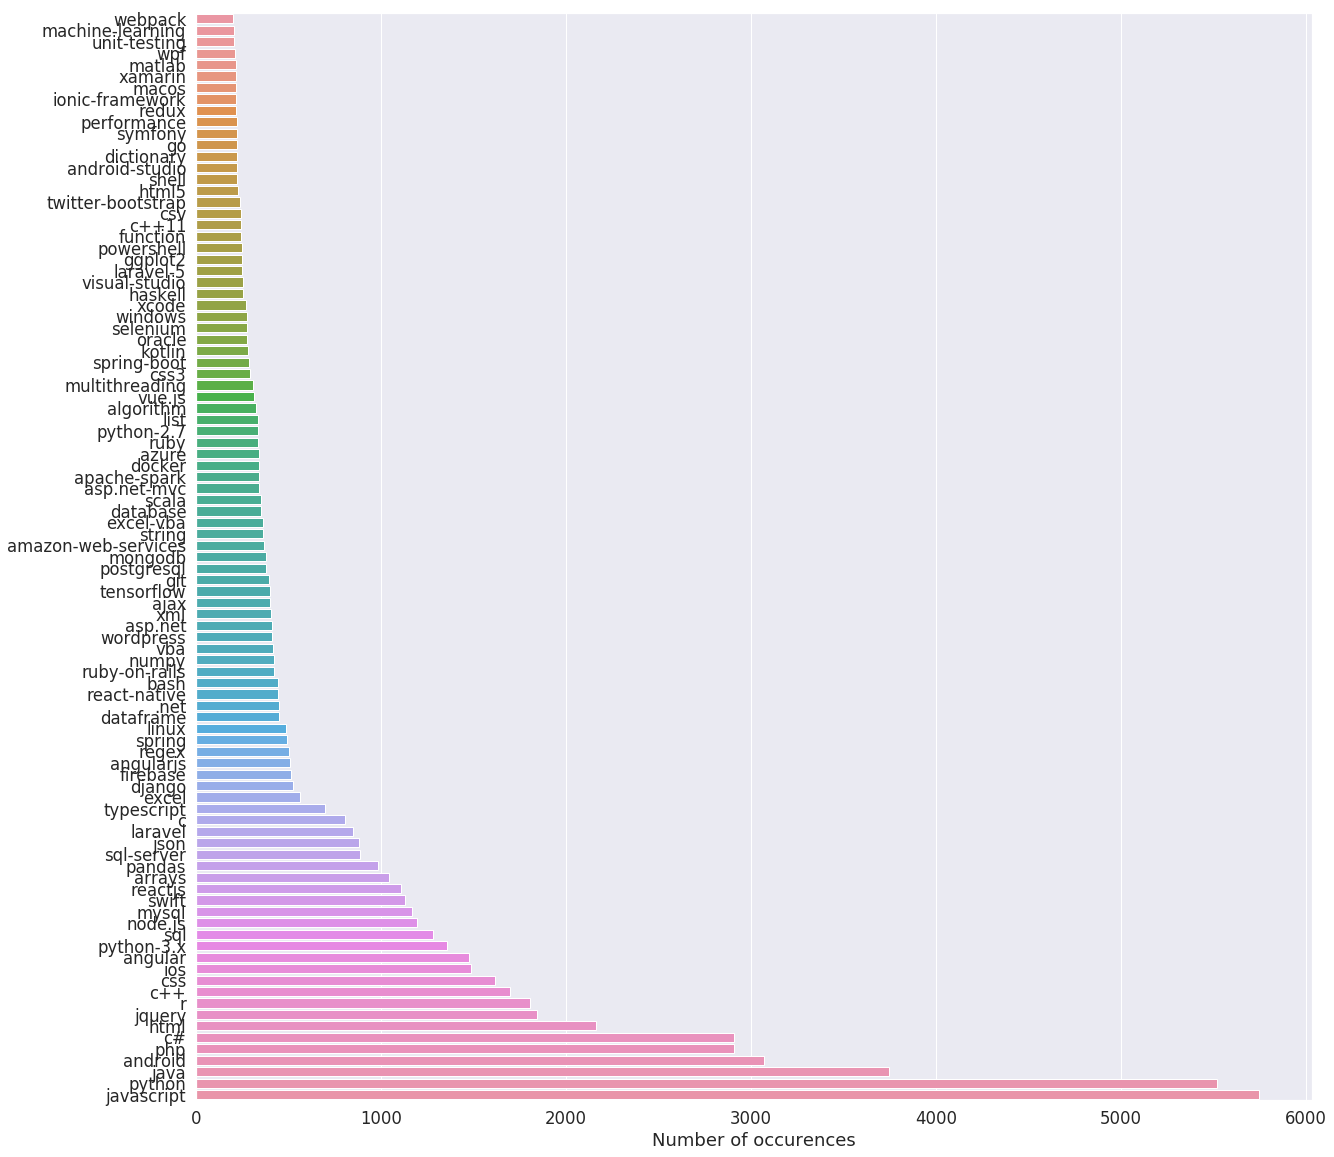

In [296]:
x, y = tags_statistic(200, tags_occurences)
my_df = pd.DataFrame({'occurences': x, 'index': y})
my_df = my_df.sort_values('occurences')

fig, (ax) = plt.subplots(1, 1)
fig.set_size_inches(20, 20)
sns.set(font_scale=1.5)   
sns.barplot(x='occurences', y="index", data=my_df, ax=ax)

ax.set_xlabel('Number of occurences')
ax.set_ylabel('')

We then keep **99 different tags**.

In [297]:
my_df.shape

(95, 2)

Let's observe the percent of questions covered defining a threshold in the number of **tags** kept:

In [298]:
threshold_list = [500, 400, 300, 200]
questions_covered_percent = []
nb_tags = []

In [299]:
for thresh in threshold_list:
    x, y = tags_statistic(thresh, tags_occurences)
    tags_filtered = y
    nb_questions = df.shape[0]
    nb_fitted_tags = 0
    for index, col in  df.iterrows():
        S1 = set(col['Tags'].split('|'))
        S2 = set(tags_filtered)
        ret = S1.intersection(S2)
        if bool(ret):
            nb_fitted_tags += 1
    questions_covered_percent.append((nb_fitted_tags / nb_questions) * 100)
    nb_tags.append(len(y))

In [300]:
nb_tags

[31, 43, 63, 95]

In [301]:
questions_covered_percent

[72.816, 76.31400000000001, 81.492, 85.354]

In [302]:
threshold_list

[500, 400, 300, 200]

We also need to consider the precision of our model during training process. If we consider **5** folds, in case we keep tags represented by **200** different question, it means we have then **50** tags used per fold (in best case), so an error of **2.5%** per each tag, which is quit really bad. For a number of **500**, we decrease this error to **1%** which seems to be more reasonable.

Text(0, 0.5, '')

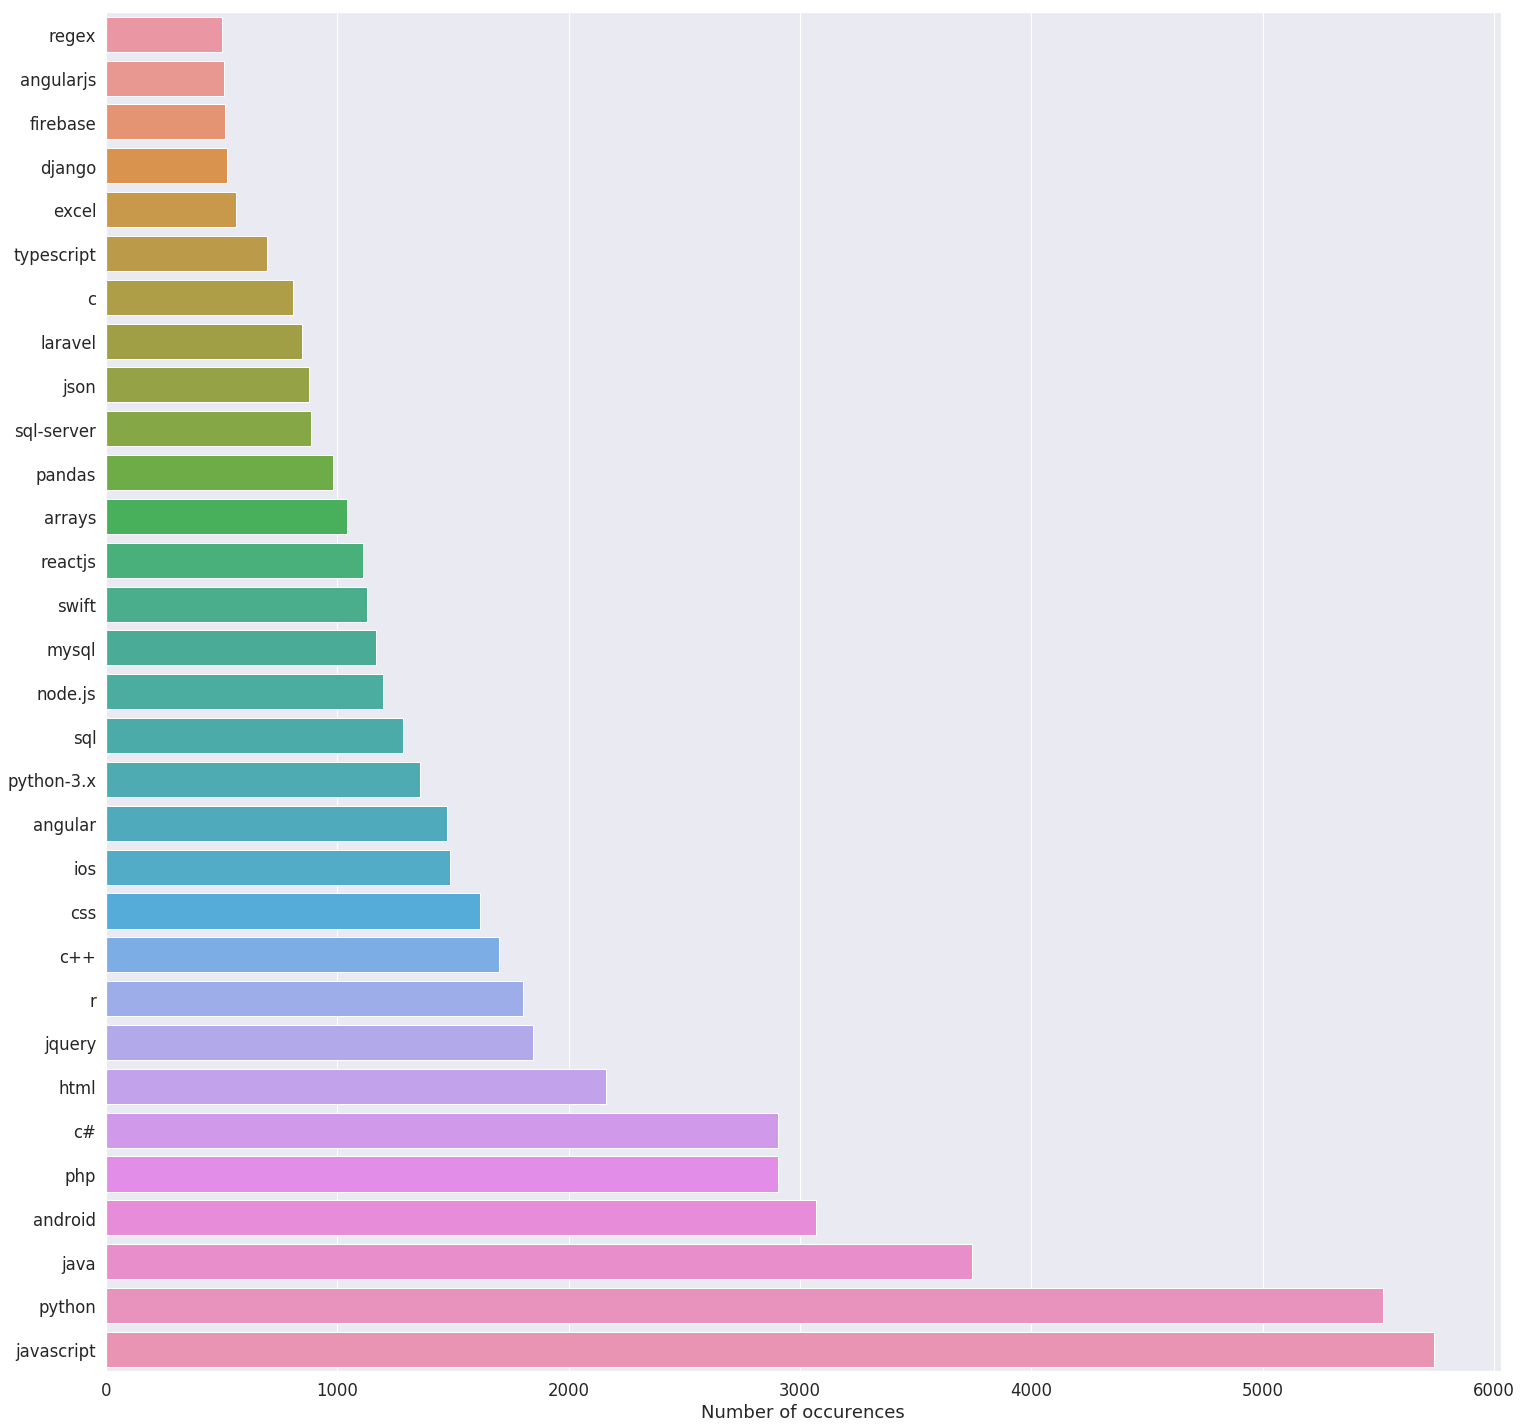

In [303]:
x, y = tags_statistic(500, tags_occurences)
my_df = pd.DataFrame({'occurences': x, 'index': y})
my_df = my_df.sort_values('occurences')

fig, (ax) = plt.subplots(1, 1)
fig.set_size_inches(25, 25)
sns.set(font_scale=1.5)   
sns.barplot(x='occurences', y="index", data=my_df, ax=ax)

ax.set_xlabel('Number of occurences')
ax.set_ylabel('')

Remove all questions that does not match with one of tags selected

In [304]:
tags_filtered = y
df_clean = df.copy(deep=True)
df_clean = df_clean[['Body', 'Title', 'Tags']]
entry_without_tags_matching = []
for index, col in  df_clean.iterrows():
    S1 = set(col['Tags'].split('|'))
    S2 = set(tags_filtered)
    ret = S1.intersection(S2)
    if not bool(ret):
        entry_without_tags_matching.append(index)
print("entry_without_tags_matching: {}".format(len(entry_without_tags_matching)))

entry_without_tags_matching: 13592


In [305]:
df_clean.drop(entry_without_tags_matching, axis=0, inplace=True)

In [306]:
df_clean.reset_index(inplace=True)

Let's clean now all questions with not-selected tags and build y vector

In [307]:
y = df_clean['Tags'].str.split('|').tolist()
y[:5]

[['python', 'pandas'],
 ['c++', 'llvm', 'ubuntu-16.04', 'eclipse-cdt', 'clang++'],
 ['c#', 'c1flexgrid'],
 ['javascript', 'arrays', 'object', 'dictionary'],
 ['java', 'jms', 'message-queue']]

Remove tags for questions that does not match with **tags_filtered** array

In [308]:
for i in range(len(y)):
    tmp = y[i]
    to_be_removed = []
    # loop through each tags of each question
    # check if tag is present in tags_filtered list.
    for test in tmp:
        try:
            tags_filtered.index(test)
        except:
            to_be_removed.append(test)
    y[i] = [e for e in y[i] if e not in to_be_removed]

In [309]:
y[:5]

[['python', 'pandas'], ['c++'], ['c#'], ['javascript', 'arrays'], ['java']]

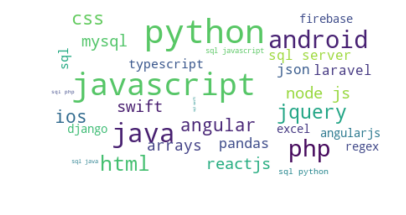

In [310]:
from wordcloud import WordCloud, STOPWORDS
import random
stopwords = set(STOPWORDS)
words = [str(elem) for item in y for elem in item]
random.shuffle(words)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(words))

#print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [311]:
df_clean['y'] = y
df_clean['y'] = df_clean['y'].apply(lambda x: ' '.join(x))

In [312]:
list_of_tags = df_clean['y'].apply(lambda x: x.split()).tolist()
list_of_unique_tags = []
for y_item in list_of_tags:
    for y_item_item in y_item:
        list_of_unique_tags.append(y_item_item)
list_of_unique_tags = list(set(list_of_unique_tags))
list_of_unique_tags

['firebase',
 'regex',
 'python-3.x',
 'excel',
 'django',
 'c++',
 'laravel',
 'javascript',
 'reactjs',
 'php',
 'angularjs',
 'sql-server',
 'jquery',
 'python',
 'java',
 'node.js',
 'json',
 'c',
 'css',
 'sql',
 'mysql',
 'r',
 'typescript',
 'angular',
 'ios',
 'swift',
 'c#',
 'arrays',
 'android',
 'pandas',
 'html']

## 1.3 Body and Title cleaning

Let's build **raw** column to collect **Body** and **Title** columns.

In [313]:
from bs4 import BeautifulSoup
df_clean["raw"] = df_clean["Body"].apply(lambda x: BeautifulSoup(x, "html").get_text())
df_clean["raw"] = df_clean["raw"] + " "
# -- Python 2.7
#df_clean["raw"] = df_clean["raw"] + df_clean["Title"].apply(lambda x: unicode(x, 'utf-8'))
df_clean["raw"] = df_clean["raw"] + df_clean["Title"]

Let's define a specific function to remove punctuation.

In [314]:
import re
def remove_punctuation(s):
    # keep '.-#+' patterns as it is contained in tags
    punctuations = "!\"$%&'()*,/:;<=>?@[\]^`{|}~\n"
    no_punct = ""
    for char in s:
        if char not in punctuations:
            no_punct = no_punct + char
        else:
            no_punct = no_punct + ' '
    return no_punct

## 1.3.1 Case of 'C++' tags

Let's focus on special tags that we should focus during cleaning the first one is **c++**.

In [316]:
test_string = df_clean['raw'].iloc[1].lower()
test_string

'i have eclipse cdt oxygen on ubuntu 16.04, with the llvm support installed. llvm 5.0.0 is installed, and i want to experiment with libc++. the problem is building a project with libc++, but without libstdc++. \n\nthe first step is building a simple "hello world" executable using c++ and libc++. for the project properties -> c/c++ build -> settings i have the following:\n\nllvm clang (all options): -o0 -emit-llvm -g3 -wall -c -fmessage-length=0 -std=c11\nllvm clang++ (all options): -o0 -emit-llvm -g3 -wall -c -fmessage-length=0  -stdlib=libc++ -std=c++17\nllvm clang linker (all options): -v -l/usr/local/lib -l/usr/lib -l/usr/lib/gcc/x86_64-linux-gnu/5/ -nodefaultlibs\n\n\nnote that "-l/usr/lib/gcc/x86_64-linux-gnu/5/" is added automatically and i cannot get rid of it.\nthe linked libraries are (in order): c++, c++abi, m, c, gcc_s, gcc, stdc++\nthe stdc++ lib is added automatically and seems impossible to strip out. this results in an executable that contains both libc++ and libstdc++ w

We can see see that we have some punctuation that we should remove, let's remove it!

In [317]:
test_string = df_clean['raw'].iloc[1].lower()
test_string = remove_punctuation(test_string)
test_string

'i have eclipse cdt oxygen on ubuntu 16.04  with the llvm support installed. llvm 5.0.0 is installed  and i want to experiment with libc++. the problem is building a project with libc++  but without libstdc++.   the first step is building a simple  hello world  executable using c++ and libc++. for the project properties -  c c++ build -  settings i have the following   llvm clang  all options   -o0 -emit-llvm -g3 -wall -c -fmessage-length 0 -std c11 llvm clang++  all options   -o0 -emit-llvm -g3 -wall -c -fmessage-length 0  -stdlib libc++ -std c++17 llvm clang linker  all options   -v -l usr local lib -l usr lib -l usr lib gcc x86_64-linux-gnu 5  -nodefaultlibs   note that  -l usr lib gcc x86_64-linux-gnu 5   is added automatically and i cannot get rid of it. the linked libraries are  in order   c++  c++abi  m  c  gcc_s  gcc  stdc++ the stdc++ lib is added automatically and seems impossible to strip out. this results in an executable that contains both libc++ and libstdc++ which we don

Nice, we keep **c++** even removing punctuation. Let's remove now double spaces.

In [318]:
test_string = df_clean['raw'].iloc[1].lower()
test_string = remove_punctuation(test_string)
test_string = test_string.split(' ')
clean_test_string = [(x if x in list_of_unique_tags else re.sub("[^a-zA-Z]", "", x)) for x in test_string]
clean_test_string = [x for x in clean_test_string if (x and x != ' ')]
' '.join(clean_test_string)

'i have eclipse cdt oxygen on ubuntu with the llvm support installed llvm is installed and i want to experiment with libc the problem is building a project with libc but without libstdc the first step is building a simple hello world executable using c++ and libc for the project properties c c++ build settings i have the following llvm clang all options o emitllvm g wall c fmessagelength std c llvm clang all options o emitllvm g wall c fmessagelength stdlib libc std c llvm clang linker all options v l usr local lib l usr lib l usr lib gcc xlinuxgnu nodefaultlibs note that l usr lib gcc xlinuxgnu is added automatically and i cannot get rid of it the linked libraries are in order c++ cabi m c gccs gcc stdc the stdc lib is added automatically and seems impossible to strip out this results in an executable that contains both libc and libstdc which we don t want does anyone know of a way to build a project without libstdc but with libc eclipse cdt oxygen with llvm support forces stdc'

## 1.3.2 Case of 'python-3.x' tags

Let's work on other special tag, **python-3.x** tag

In [319]:
test_string = df_clean['raw'].iloc[9].lower()
test_string

"i've tried searching for pyhook documentation but failed to understand it... \n\ni've also tried watching many tutorials on youtube but they won't explain how to do it, instead they just do it.\n\ni've also searched on stackoverflow posts but they are mostly related to games, and store keystrokes made on the python interpreter instead of windows.\n how could i store keyboard input in windows using python 3?"

What we can see, is that python 3 tag is not in the origin. Let's convert **python 3** string into **python-3.x** word, and define a specific rule for this tag.

Let's define a regex to fit patterns:
- 'python3'
- 'python 3'
- 'python-3'

In [320]:
test_string = df_clean['raw'].iloc[9].lower()
test_string = remove_punctuation(test_string)
test_string = re.sub(r"(python)[ ]{0,1}(3)|(python)[.]{0,1}(3)|(python)[-]{0,1}(3)", " python-3.x ", test_string)
test_string = test_string.split(' ')
clean_test_string = [(x if x in list_of_unique_tags else re.sub("[^a-zA-Z]", "", x)) for x in test_string]
clean_test_string = [x for x in clean_test_string if (x and x != ' ')]
' '.join(clean_test_string)

'i ve tried searching for pyhook documentation but failed to understand it i ve also tried watching many tutorials on youtube but they won t explain how to do it instead they just do it i ve also searched on stackoverflow posts but they are mostly related to games and store keystrokes made on the python interpreter instead of windows how could i store keyboard input in windows using python-3.x'

Nice our treatment seems to work!

## 1.3.3 Cleaning and lemmatization

Let's work on lemmatization now in order to reduce the number of features and add it into our pre-treatment pipeline.

In [154]:
!pip install nltk

    100% |################################| 1.4MB 4.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for nltk ... done
  Stored in directory: /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built nltk
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [321]:
import nltk
import nltk.stem
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

class WordNetStemmer(WordNetLemmatizer):
    def stem(self,word,pos=u'n'):
        return self.lemmatize(word,pos)

ws = WordNetStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [322]:
raw_letter = []
for val in df_clean['raw']:
    # Convert words into lower forms
    test_string = val.lower()
    # Remove punctuation
    test_string = remove_punctuation(test_string)
    # Special case for "python-3.x" pattern
    test_string = re.sub(r"(python)[ ]{0,1}(3)|(python)[.]{0,1}(3)|(python)[-]{0,1}(3)", " python-3.x ", test_string)
    # Split string into word array
    test_string = test_string.split(' ')
    # If word contains one of unique tags, keep it, else keep only words containing a-z/A-Z caracters
    clean_test_string = [(x if x in list_of_unique_tags else re.sub("[^a-zA-Z]", "", x)) for x in test_string]
    # Remove empty element
    clean_test_string = [x for x in clean_test_string if (x and x != ' ')]
    # Lemmatize (name and verb)
    clean_test_string = [(x if x in list_of_unique_tags else ws.stem(x,'n')) for x in clean_test_string]
    clean_test_string = [(x if x in list_of_unique_tags else ws.stem(x,'v')) for x in clean_test_string]
    # Remove single element not in unique tags lists
    clean_test_string = [(x if ((x in list_of_unique_tags) or (len(x) > 1)) else "") for x in clean_test_string]
    # Remove empty element
    clean_test_string = [x for x in clean_test_string if x]
    # Store into raw_letter column
    raw_letter.append(' '.join(clean_test_string))
df_clean['raw_letter'] = raw_letter

Let's check our cleaning for **c++** tags:

In [323]:
df_clean['raw'].iloc[1]

'I have Eclipse CDT Oxygen on Ubuntu 16.04, with the LLVM support installed. LLVM 5.0.0 is installed, and I want to experiment with libc++. The problem is building a project with libc++, but without libstdc++. \n\nThe first step is building a simple "Hello World" executable using c++ and libc++. For the project properties -> C/C++ Build -> Settings I have the following:\n\nLLVM Clang (all options): -O0 -emit-llvm -g3 -Wall -c -fmessage-length=0 -std=c11\nLLVM Clang++ (all options): -O0 -emit-llvm -g3 -Wall -c -fmessage-length=0  -stdlib=libc++ -std=c++17\nLLVM Clang linker (all options): -v -L/usr/local/lib -L/usr/lib -L/usr/lib/gcc/x86_64-linux-gnu/5/ -nodefaultlibs\n\n\nNote that "-L/usr/lib/gcc/x86_64-linux-gnu/5/" is added automatically and I cannot get rid of it.\nThe linked libraries are (in order): c++, c++abi, m, c, gcc_s, gcc, stdc++\nThe stdc++ lib is added automatically and seems impossible to strip out. This results in an executable that contains both libc++ and libstdc++ w

In [324]:
df_clean['raw_letter'].iloc[1]

'have eclipse cdt oxygen on ubuntu with the llvm support instal llvm be instal and want to experiment with libc the problem be build project with libc but without libstdc the first step be build simple hello world executable use c++ and libc for the project property c c++ build set have the follow llvm clang all option emitllvm wall c fmessagelength std c llvm clang all option emitllvm wall c fmessagelength stdlib libc std c llvm clang linker all option usr local lib usr lib usr lib gcc xlinuxgnu nodefaultlibs note that usr lib gcc xlinuxgnu be add automatically and cannot get rid of it the link library be in order c++ cabi c gccs gcc stdc the stdc lib be add automatically and seem impossible to strip out this result in an executable that contain both libc and libstdc which we don want doe anyone know of way to build project without libstdc but with libc eclipse cdt oxygen with llvm support force stdc'

Lemmatization works well and we keep **c++** tag.

Let's also check for **python-3.x** tags:

In [325]:
df_clean['raw'].iloc[9]

"I've tried searching for pyHook documentation but failed to understand it... \n\nI've also tried watching many tutorials on youtube but they won't explain how to do it, instead they just do it.\n\nI've also searched on StackOverflow posts BUT they are mostly related to games, and store keystrokes made on the python interpreter instead of Windows.\n How could i store keyboard input in Windows using Python 3?"

It works also for **python-3.x**.

In [326]:
df_clean['raw_letter'].iloc[9]

've try search for pyhook documentation but fail to understand it ve also try watch many tutorial on youtube but they win explain how to do it instead they just do it ve also search on stackoverflow post but they be mostly relate to game and store keystroke make on the python interpreter instead of window how could store keyboard input in window use python-3.x'

If we observe **raw_letter** content:

In [327]:
word = [x.split(' ') for x in df_clean['raw_letter']]
word = [item for sublist in word for item in sublist]
word

['have',
 'two',
 'dataframes',
 'that',
 'try',
 'to',
 'combine',
 'they',
 'each',
 'have',
 'multiindex',
 'but',
 'those',
 'index',
 'have',
 'no',
 'overlap',
 'level',
 'the',
 'dfs',
 'be',
 'each',
 'the',
 'same',
 'width',
 'df',
 'location',
 'year',
 'df',
 'age',
 'sex',
 'want',
 'to',
 'make',
 'new',
 'dataframe',
 'that',
 'ha',
 'entry',
 'for',
 'every',
 'combination',
 'of',
 'the',
 'two',
 'index',
 'with',
 'value',
 'equal',
 'to',
 'the',
 'product',
 'of',
 'the',
 'value',
 'in',
 'correspond',
 'column',
 'result',
 'location',
 'year',
 'age',
 'sex',
 'etc',
 'think',
 'could',
 'join',
 'the',
 'dfs',
 'and',
 'then',
 'multiply',
 'column',
 'by',
 'column',
 'but',
 'wonder',
 'if',
 'there',
 'way',
 'to',
 'do',
 'it',
 'more',
 'automatically',
 'since',
 'pandas',
 'build',
 'in',
 'multiplication',
 'be',
 'so',
 'much',
 'faster',
 'thank',
 'how',
 'to',
 'combine',
 'two',
 'differently',
 'multiindexed',
 'pandas',
 'dataframes',
 'by',
 'mu

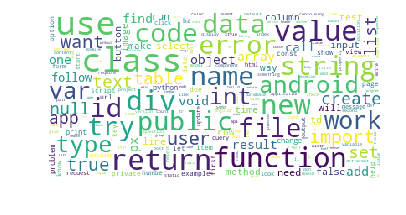

In [328]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
word = [x.split(' ') for x in df_clean['raw_letter']]
word = [item for sublist in word for item in sublist]
random.shuffle(word)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(word))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Some words seems to produce a useful information in the case of tag prediction (android,array) and some other does not give useful information.

## 1.3.4 Optimize feature selection

In order to optimize feature selections, let's try to observe number of features required to covered all the tags.

In [329]:
X = df_clean["raw_letter"]

In [330]:
from sklearn.feature_extraction.text import CountVectorizer

If we vectorize the **raw_letter** information, we can see that the vocabulary length is equal to:

In [331]:
cv = CountVectorizer(stop_words='english', lowercase=True, tokenizer=lambda x: x.split(' '))
cv.fit(X)
vocab = cv.vocabulary_
print ("Vocabulary length: %d " %len(vocab))

Vocabulary length: 315034 


In [332]:
len(list(set(vocab).intersection(list_of_unique_tags)))

31

Let's try to optimize max_df/min_df parameters from CountVectorizer to establish best values to cover the maximum number of tags.

In [333]:
max_df_item = 0.3
min_df_item = 3
cv = CountVectorizer(stop_words='english', 
                             lowercase=True, 
                             tokenizer=lambda x: x.split(' '),
                             max_df=max_df_item, min_df=min_df_item)
X_cv = cv.fit_transform(X)
vocab = cv.vocabulary_
message =  "max_df: %f" %max_df_item
message += " min_df: %f" %min_df_item
message += " nb tag covered: %d" %len(list(set(vocab).intersection(list_of_unique_tags)))
message += " features length: %d" %len(cv.vocabulary_)
print(message)

max_df: 0.300000 min_df: 3.000000 nb tag covered: 31 features length: 39094


We can decrease number of features to 39k but it seems to much important in case of prediction.

In [334]:
max_df = [0.1,0.2,0.3]
min_df = [50,100,200]
for max_df_item in max_df:
    for min_df_item in min_df:
        cv = CountVectorizer(stop_words='english', 
                             lowercase=True, 
                             tokenizer=lambda x: x.split(' '),
                             max_df=max_df_item, min_df=min_df_item)
        X_cv = cv.fit_transform(X)
        vocab = cv.vocabulary_
        message =  "max_df: %f" %max_df_item
        message += " min_df: %f" %min_df_item
        message += " nb tag covered: %d" %len(list(set(vocab).intersection(list_of_unique_tags)))
        message += " features length: %d" %len(cv.vocabulary_)
        message += " missing tags: %s" %list(set(list_of_unique_tags) - set(vocab))
        print(message)

max_df: 0.100000 min_df: 50.000000 nb tag covered: 29 features length: 3381 missing tags: ['c', 'sql-server']
max_df: 0.100000 min_df: 100.000000 nb tag covered: 29 features length: 2049 missing tags: ['c', 'sql-server']
max_df: 0.100000 min_df: 200.000000 nb tag covered: 28 features length: 1229 missing tags: ['reactjs', 'c', 'sql-server']
max_df: 0.200000 min_df: 50.000000 nb tag covered: 30 features length: 3429 missing tags: ['sql-server']
max_df: 0.200000 min_df: 100.000000 nb tag covered: 30 features length: 2097 missing tags: ['sql-server']
max_df: 0.200000 min_df: 200.000000 nb tag covered: 29 features length: 1277 missing tags: ['reactjs', 'sql-server']
max_df: 0.300000 min_df: 50.000000 nb tag covered: 30 features length: 3439 missing tags: ['sql-server']
max_df: 0.300000 min_df: 100.000000 nb tag covered: 30 features length: 2107 missing tags: ['sql-server']
max_df: 0.300000 min_df: 200.000000 nb tag covered: 29 features length: 1287 missing tags: ['reactjs', 'sql-server']


What we can see is that we can reach **2097** features removing **sql-server** tag. The penality of **sql-server** seems really high

Let's work on **sql-server** tag:

In [335]:
entry_without_tags_matching = []
for index, col in  df_clean.iterrows():
    if col['y'] == 'sql-server':
        entry_without_tags_matching.append(index)
print("entry_without_tags_matching: {}".format(len(entry_without_tags_matching)))

entry_without_tags_matching: 354


We have **354** questions that does not match with **sql-server**, let's remove them.

In [336]:
df_clean.drop(entry_without_tags_matching, axis=0, inplace=True)

Let's remove questions that matches with **sql-server**:

In [337]:
y = df_clean['y']
y_new = []
for y_item in y:
    tmp = y_item.split(' ')
    new_y = []
    for el in tmp:
        if el != 'sql-server':
            new_y.append(el)
    y_new.append(' '.join(new_y))
df_clean['y'] = y_new

In [338]:
final_list_of_tags = df_clean['y'].apply(lambda x: x.split()).tolist()
final_list_of_unique_tags = []
for y_item in final_list_of_tags:
    for y_item_item in y_item:
        final_list_of_unique_tags.append(y_item_item)
final_list_of_unique_tags = list(set(final_list_of_unique_tags))
final_list_of_unique_tags

['firebase',
 'regex',
 'python-3.x',
 'excel',
 'django',
 'c++',
 'laravel',
 'javascript',
 'reactjs',
 'php',
 'angularjs',
 'jquery',
 'python',
 'java',
 'node.js',
 'json',
 'c',
 'css',
 'sql',
 'mysql',
 'r',
 'typescript',
 'angular',
 'ios',
 'swift',
 'c#',
 'arrays',
 'android',
 'pandas',
 'html']

In [339]:
X = df_clean["raw_letter"]

max_df_item = 0.2
min_df_item = 100
cv = CountVectorizer(stop_words='english', 
                             lowercase=True, 
                             tokenizer=lambda x: x.split(' '),
                             max_df=max_df_item, min_df=min_df_item)
X_cv = cv.fit_transform(X)
vocab = cv.vocabulary_
message =  "max_df: %f" %max_df_item
message += " min_df: %f" %min_df_item
message += " nb tag covered: %d" %len(list(set(vocab).intersection(final_list_of_unique_tags)))
message += " features length: %d" %len(cv.vocabulary_)
print(message)

max_df: 0.200000 min_df: 100.000000 nb tag covered: 30 features length: 2082


We finally reach a number of feature of 2k with 30 tags cover.

# 2.Store Final Dataset

Let's store final dataset for modelisation.

In [340]:
df_clean.to_csv('dataset_clean.csv', sep='\t', index=False, encoding='utf-8')